In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
x = data.drop(columns = ["Species"])
y = data["Species"]

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [12]:
acc = accuracy_score(ytest, ypred)
acc

1.0

<AxesSubplot:>

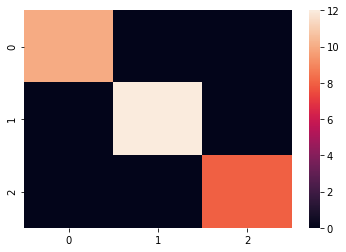

In [13]:
sns.heatmap(confusion_matrix(ytest,ypred))

In [14]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
## Hyperparameter
#parameters
criterion = ["gini","entropy"]
max_depth = list(range(1,11))
#parameter grid
grid = {"criterion":criterion, "max_depth":max_depth}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits = 10 , n_repeats = 3, random_state = 1)

In [20]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator = model, param_grid = grid, cv= cv, scoring="accuracy")
res = grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

0.9916666666666667
{'criterion': 'gini', 'max_depth': 7}
